In [1]:
#import will2live
import pandas as pd

### LOAD

In [2]:
df=pd.read_excel('McData.xlsx',sheet_name='sales_data')

#### Dropping columns we can easily merge back in later, as not immediately needed

In [3]:
# for now, dropping restaurant data, as we can grab that again later.
df.drop(['REST_KEY','City','County','latitude','longitude'],axis=1,inplace=True)

In [4]:
# Grouping by 'restaurant_key' and checking unique 'restaurant_label' values
inconsistencies = df.groupby('rest_label')['trad_label'].nunique()

# Filtering to get only those keys that are associated with more than one label
inconsistent_keys = inconsistencies[inconsistencies > 1]

if len(inconsistent_keys) > 0:
    print("Inconsistent restaurant keys found:")
    print(inconsistent_keys)
else:
    print("All restaurant keys are consistently matched with their labels.")


All restaurant keys are consistently matched with their labels.


In [5]:
# Grouping by 'restaurant_key' and checking unique 'owner_label' values
inconsistencies = df.groupby('rest_label')['owner_label'].nunique()

# Filtering to get only those keys that are associated with more than one label
inconsistent_keys = inconsistencies[inconsistencies > 1]

if len(inconsistent_keys) > 0:
    print("Inconsistent restaurant keys found:")
    print(inconsistent_keys)
else:
    print("All restaurant keys are consistently matched with their labels.")


All restaurant keys are consistently matched with their labels.


In [6]:
df.drop(['owner_label','trad_label'],axis=1,inplace=True)

In [7]:
df.rename({'Initial Data Ordering_ID':'id1'},axis=1,inplace=True)

In [8]:
# Since those are consistent, we can drop ItemN for now
df.drop(['ItemN'],inplace=True,axis=1)

#### Missing Values for lots of breakfast items

In [9]:
df[df['wavg_price'].isna()]

,id1,rest_label,itemdesc,wk_ending,wavg_price,upt,agc_atpd,adus,totunits,rev_on_units
1255,1256,02308-WALKER-ALPINE,Total All Day Breakfast Items,2015-05-09,NaN,NaN,NaN,NaN,NaN,0.0
1256,1257,02308-WALKER-ALPINE,Total All Day Breakfast Items,2015-05-16,NaN,NaN,NaN,NaN,NaN,0.0
1257,1258,02308-WALKER-ALPINE,Total All Day Breakfast Items,2015-05-23,NaN,NaN,NaN,NaN,NaN,0.0
1258,1259,02308-WALKER-ALPINE,Total All Day Breakfast Items,2015-05-30,NaN,NaN,NaN,NaN,NaN,0.0
1259,1260,02308-WALKER-ALPINE,Total All Day Breakfast Items,2015-06-06,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...
302237,302238,36302-GRANDVILLE - RIVERTOWN &,McDouble,2013-07-13,NaN,NaN,NaN,NaN,NaN,0.0
302238,302239,36302-GRANDVILLE - RIVERTOWN &,McDouble,2013-07-20,NaN,NaN,NaN,NaN,NaN,0.0
302239,302240,36302-GRANDVILLE - RIVERTOWN &,McDouble,2013-07-27,NaN,NaN,NaN,NaN,NaN,0.0
302240,302241,36302-GRANDVILLE - RIVERTOWN &,McDouble,2013-08-03,NaN,NaN,NaN,NaN,NaN,0.0


In [10]:
df[df['wavg_price'].isna()]['itemdesc'].value_counts()

itemdesc
Bac Egg Ch Biscuit               319
Sausage Biscuit                  319
Sausage Egg Biscuit              319
Total McGriddles                 319
Bac Egg Ch McGriddle             319
Sau Egg Ch McGriddle             319
Total Bagels                     319
Total Biscuits                   319
Total All Day Breakfast Items    130
Big Mac                          130
McChicken                        130
Total Fries                      130
Chicken Category                 130
Cheeseburger                     130
Hamburger                        130
Core QP and QPC                  130
Sausage McMuffin                 130
Large Burgers                    130
Beef Category                    130
Hashbrown                        130
Sausage Egg McMuffin             130
Egg McMuffin                     130
Total McMuffins                  130
Total Breakfast Sandwich         130
McDouble                         130
Name: count, dtype: int64

In [11]:
# looks like we have lots of missing values for only breakfast items
# due to the fact that we're missing all numerical values, I can't think of a way to fill them in.

# while we could figure out the wavg_price for the items, based on seeing what the wavg_price is for items from the same location, 
    # on the date closest to the missing date.
        # we still wouldn't have a way to reliably figure out amounts
         # there's a worrying issue also shown in screenshot below,  for now   we drop missing data



#### Screenshot of data issue

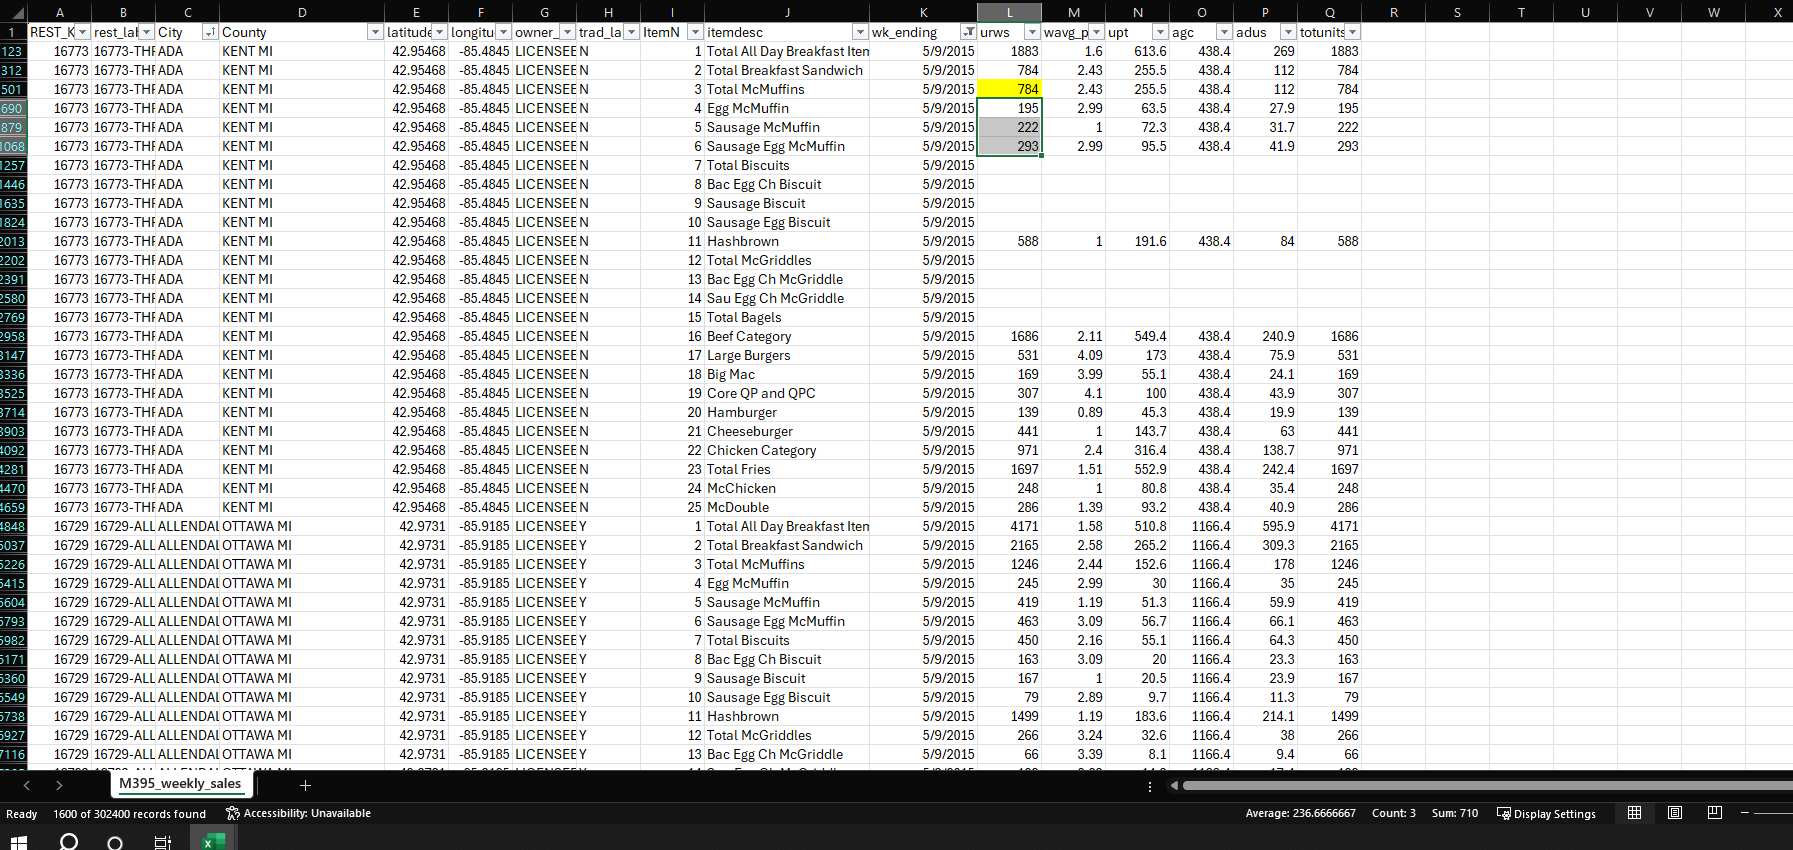

In [12]:
from PIL import Image
from IPython.display import display
display(Image.open("issue1.png"))

#### adus calculation check

In [13]:
df.head()

,id1,rest_label,itemdesc,wk_ending,wavg_price,upt,agc_atpd,adus,totunits,rev_on_units
0,1,00117-WYOM-1221 28TH,Total All Day Breakfast Items,2013-01-12,1.39,550.3,1608.3,885.0,6195.0,8611.05
1,2,00117-WYOM-1221 28TH,Total All Day Breakfast Items,2013-01-19,1.39,584.4,1572.7,919.1,6434.0,8943.26
2,3,00117-WYOM-1221 28TH,Total All Day Breakfast Items,2013-01-26,1.40,566.8,1389.7,787.7,5514.0,7719.60
3,4,00117-WYOM-1221 28TH,Total All Day Breakfast Items,2013-02-02,1.42,552.7,1498.0,828.0,5796.0,8230.32
4,5,00117-WYOM-1221 28TH,Total All Day Breakfast Items,2013-02-09,1.43,574.4,1567.9,900.6,6304.0,9014.72


In [14]:
df[['totunits','adus']].head(2)

,totunits,adus
0,6195.0,885.0
1,6434.0,919.1


In [15]:
df2=df.copy()

In [16]:
df2['adus_math']=df2['totunits']/7
df2[df2['adus']!=df2['totunits']/7].head(4)

,id1,rest_label,itemdesc,wk_ending,wavg_price,upt,agc_atpd,adus,totunits,rev_on_units,adus_math
1,2,00117-WYOM-1221 28TH,Total All Day Breakfast Items,2013-01-19,1.39,584.4,1572.7,919.1,6434.0,8943.26,919.142857
2,3,00117-WYOM-1221 28TH,Total All Day Breakfast Items,2013-01-26,1.40,566.8,1389.7,787.7,5514.0,7719.60,787.714286
4,5,00117-WYOM-1221 28TH,Total All Day Breakfast Items,2013-02-09,1.43,574.4,1567.9,900.6,6304.0,9014.72,900.571429
5,6,00117-WYOM-1221 28TH,Total All Day Breakfast Items,2013-02-16,1.42,557.5,1666.7,929.1,6504.0,9235.68,929.142857


In [17]:
df2['adus_dff']=df2['adus_math']-df2['adus']
df2.head(2)

,id1,rest_label,itemdesc,wk_ending,wavg_price,upt,agc_atpd,adus,totunits,rev_on_units,adus_math,adus_dff
0,1,00117-WYOM-1221 28TH,Total All Day Breakfast Items,2013-01-12,1.39,550.3,1608.3,885.0,6195.0,8611.05,885.000000,0.000000
1,2,00117-WYOM-1221 28TH,Total All Day Breakfast Items,2013-01-19,1.39,584.4,1572.7,919.1,6434.0,8943.26,919.142857,0.042857


In [18]:
df['adus_math']=df['totunits']/7
df.head(2)

,id1,rest_label,itemdesc,wk_ending,wavg_price,upt,agc_atpd,adus,totunits,rev_on_units,adus_math
0,1,00117-WYOM-1221 28TH,Total All Day Breakfast Items,2013-01-12,1.39,550.3,1608.3,885.0,6195.0,8611.05,885.000000
1,2,00117-WYOM-1221 28TH,Total All Day Breakfast Items,2013-01-19,1.39,584.4,1572.7,919.1,6434.0,8943.26,919.142857


In [19]:
# Looks like adus is unreliably calculated, probably due to short weeks or something,  we'll rely on adus_math instead

In [20]:
df[df['totunits'].isna()].head(3)

,id1,rest_label,itemdesc,wk_ending,wavg_price,upt,agc_atpd,adus,totunits,rev_on_units,adus_math
1255,1256,02308-WALKER-ALPINE,Total All Day Breakfast Items,2015-05-09,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1256,1257,02308-WALKER-ALPINE,Total All Day Breakfast Items,2015-05-16,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1257,1258,02308-WALKER-ALPINE,Total All Day Breakfast Items,2015-05-23,NaN,NaN,NaN,NaN,NaN,0.0,NaN


#### DROPPING NA ROWS

In [21]:
df.dropna(inplace=True)
df.head(2)

,id1,rest_label,itemdesc,wk_ending,wavg_price,upt,agc_atpd,adus,totunits,rev_on_units,adus_math
0,1,00117-WYOM-1221 28TH,Total All Day Breakfast Items,2013-01-12,1.39,550.3,1608.3,885.0,6195.0,8611.05,885.000000
1,2,00117-WYOM-1221 28TH,Total All Day Breakfast Items,2013-01-19,1.39,584.4,1572.7,919.1,6434.0,8943.26,919.142857


### New Grouped DataFrame

#### Simplifying the Data & Creating a New Dataframe of data at a weekly level, across all restaurants

In [22]:
df2 = df.copy()

# Define the list of items to keep
shortlist_items = [
    "Total All Day Breakfast Items",
    "Total Fries",
    "Beef Category",
    "Big Mac",
    "Cheeseburger",
    "Chicken Category",
    "Core QP and QPC",
    "Hamburger",
    "Large Burgers",
    "McChicken",
    "McDouble"
]

# Reduce to a smaller list of items
df2 = df2[df2['itemdesc'].isin(shortlist_items)]

# Drop columns that shouldn't be summed
df2.drop(['rest_label', 'id1'], axis=1, inplace=True)

# Group by 'wk_ending' and 'itemdesc' to calculate total units and mean of 'agc_atpd'
# and also find the mode of 'wavg_price' for each group
df_grouped = df2.groupby(['wk_ending', 'itemdesc']).agg({
    'totunits': 'sum',
    'wavg_price': lambda x: x.mode()[0] if not x.mode().empty else np.NaN,
    'agc_atpd': 'mean'
}).reset_index()

For Reference:

Here is the complete list of items, with marks on what was excluded.

-  Total All Day Breakfast Items
-  Total Fries
-  Beef Category
-  Big Mac
-  Cheeseburger
-  Chicken Category
-  Core QP and QPC
-  Hamburger
-  Large Burgers
-  McChicken
-  McDouble
- ~~Total Breakfast Sandwich~~
-  ~~Total McMuffins~~
-  ~~Egg McMuffin~~
-  ~~Sausage McMuffin~~
-  ~~Sausage Egg McMuffin~~
-  ~~Total Biscuits~~
-  ~~Bac Egg Ch Biscuit~~
-  ~~Sausage Biscuit~~
-  ~~Sausage Egg Biscuit~~
-  ~~Hashbrown~~
-  ~~Total McGriddles~~
-  ~~Bac Egg Ch McGriddle~~
-  ~~Sau Egg Ch McGriddle~~
-  ~~Total Bagels~~


In [23]:
df_grouped.head(2)

,wk_ending,itemdesc,totunits,wavg_price,agc_atpd
0,2013-01-12,Beef Category,338249.0,1.51,1338.590323
1,2013-01-12,Big Mac,29791.0,3.69,1338.590323


In [24]:
# Calculate the total units sold per week for all items
total_units_per_week = df_grouped.groupby('wk_ending')['totunits'].sum().reset_index(name='total_week_units')

# Merge this back into df_grouped to associate each week with its total units
df_grouped = df_grouped.merge(total_units_per_week, on='wk_ending')

# Calculate the proportion for each item
df_grouped['item_proportion'] = df_grouped['totunits'] / df_grouped['total_week_units']

# Final df_grouped with the new 'item_proportion' column
df_grouped

,wk_ending,itemdesc,totunits,wavg_price,agc_atpd,total_week_units,item_proportion
0,2013-01-12,Beef Category,338249.0,1.51,1338.590323,1499153.0,0.225627
1,2013-01-12,Big Mac,29791.0,3.69,1338.590323,1499153.0,0.019872
2,2013-01-12,Cheeseburger,53842.0,0.99,1338.590323,1499153.0,0.035915
3,2013-01-12,Chicken Category,204602.0,1.98,1338.590323,1499153.0,0.136478
4,2013-01-12,Core QP and QPC,25947.0,3.63,1338.590323,1499153.0,0.017308
...,...,...,...,...,...,...,...
2074,2016-08-20,Large Burgers,63695.0,4.13,1254.437500,1531943.0,0.041578
2075,2016-08-20,McChicken,74073.0,1.29,1254.437500,1531943.0,0.048352
2076,2016-08-20,McDouble,92468.0,1.49,1254.437500,1531943.0,0.060360
2077,2016-08-20,Total All Day Breakfast Items,390224.0,1.66,1254.437500,1531943.0,0.254725


In [25]:
df_grouped['rev']=df_grouped['wavg_price']*df_grouped['totunits']
df_grouped['adus']=df_grouped['totunits']/7
df_grouped

,wk_ending,itemdesc,totunits,wavg_price,agc_atpd,total_week_units,item_proportion,rev,adus
0,2013-01-12,Beef Category,338249.0,1.51,1338.590323,1499153.0,0.225627,510755.99,48321.285714
1,2013-01-12,Big Mac,29791.0,3.69,1338.590323,1499153.0,0.019872,109928.79,4255.857143
2,2013-01-12,Cheeseburger,53842.0,0.99,1338.590323,1499153.0,0.035915,53303.58,7691.714286
3,2013-01-12,Chicken Category,204602.0,1.98,1338.590323,1499153.0,0.136478,405111.96,29228.857143
4,2013-01-12,Core QP and QPC,25947.0,3.63,1338.590323,1499153.0,0.017308,94187.61,3706.714286
...,...,...,...,...,...,...,...,...,...
2074,2016-08-20,Large Burgers,63695.0,4.13,1254.437500,1531943.0,0.041578,263060.35,9099.285714
2075,2016-08-20,McChicken,74073.0,1.29,1254.437500,1531943.0,0.048352,95554.17,10581.857143
2076,2016-08-20,McDouble,92468.0,1.49,1254.437500,1531943.0,0.060360,137777.32,13209.714286
2077,2016-08-20,Total All Day Breakfast Items,390224.0,1.66,1254.437500,1531943.0,0.254725,647771.84,55746.285714


In [26]:
df_grouped.to_csv('df_grouped.csv')

### Grouped DataFrame V2
This version of the dataframe exists for a few reasons:

One, it will contain all of the different item descriptions.


Two, it will contain a new line item for every week, representing a combination of every non breakfast item except McChicken (included in chicken), Beef Category, and Large Burgers.
    That is because we have determined this to be the most accurate way to avoid overlap, and can adjust with client insight.
Essentially,  Total Non-Breakfast items.

    
Three, it will contain a new line item for every week, representing an approximate totals.




(Beating a dead horse that this is an oversimplification, and by injecting better price data and expanding the scope, we can have a more accurate analytical tool)
( It is currently more directional than anything )

In [27]:
### I believe the easiest way to do this is to create a new dataframe with all of the missing data, and add it in. 

In [28]:
####### THIS WILL HAVE TO WAIT TO BE IMPLEMENTED, TIME IS A LIMITING FACTOR

In [32]:
## I want to later think through, assuming we have all of the data we need.  
### (Let's say, realisticly, we could have monthly or yearly costs for each item per region)
#### Luckily here, we would be only looking at one region,  so lets say costs for each item yearly

##### How can we make this grouped data frame as accurate as possible, and how can we make a total revenue chart that is as accurate as possible?

I'm thinking that we would need a new dataframe from some transformations here.

Basically, I'm thinking:

Looking at one item,  we're going to have to get the total revenue for that item for a given day (or week in our case)
then we need to do the same with any 

## Extra Dataframe with scaled data, for kmeans

In [29]:
from sklearn.preprocessing import StandardScaler

# First, you select the numerical columns (features) to be standardized
numerical_features = df_grouped.select_dtypes(include=['int64', 'float64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

df_grouped_scaled=df_grouped.copy()

# Fit the scaler to the data and transform it
df_grouped_scaled[numerical_features] = scaler.fit_transform(df_grouped[numerical_features])

# Now 'df' has the standardized features with mean=0 and std=1 for the numerical columns

df_grouped_scaled.head(2)

,wk_ending,itemdesc,totunits,wavg_price,agc_atpd,total_week_units,item_proportion,rev,adus
0,2013-01-12,Beef Category,1.666629,-0.478436,0.116331,-0.277203,1.735958,1.312073,1.666629
1,2013-01-12,Big Mac,-0.915248,1.317396,0.116331,-0.277203,-0.915378,-0.710861,-0.915248


In [30]:
import pandas as pd

# Suppose 'column_name' is the column you want to turn into dummies
dummies = pd.get_dummies(df_grouped_scaled['itemdesc'], prefix='is_',drop_first=True,dtype='int32')
df_gsd = df_grouped_scaled.drop('itemdesc', axis=1)

# Concatenate the dummies dataframe with the original dataframe
df_gsd = pd.concat([df_gsd, dummies], axis=1)
df_gsd.head(1)

,wk_ending,totunits,wavg_price,agc_atpd,total_week_units,item_proportion,rev,adus,is__Big Mac,is__Cheeseburger,is__Chicken Category,is__Core QP and QPC,is__Hamburger,is__Large Burgers,is__McChicken,is__McDouble,is__Total All Day Breakfast Items,is__Total Fries
0,2013-01-12,1.666629,-0.478436,0.116331,-0.277203,1.735958,1.312073,1.666629,0,0,0,0,0,0,0,0,0,0


In [31]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
X=df_gsd.drop(['wk_ending'],axis=1)